# Project 1: Navigation

### Preliminary actions

In [1]:
# Importing the necessary packages
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch

from dqn_agent import Agent

IMPORTANT: introduce in the following cell the path to file of the Banana collector evironment.

In [2]:
# Instantiating the environment
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Unity ML-Agents environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the brains available. There is only one and, therefore, it is  set as the default brain. It will be controlled from Python.

In [3]:
# Getting and selecting the default brain
brain_names = env.brain_names
print('Available brains:',brain_names)
brain = env.brains[brain_names[0]]
print(brain)

Available brains: ['BananaBrain']
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# Reseting the environment
env_info = env.reset(train_mode=False)[brain_names[0]]

# Number of actions
action_size = brain.vector_action_space_size

# State space dimension
state_size = len(env_info.vector_observations[0])

In [5]:
# Initialize agent
agent = Agent(state_size = state_size, action_size = action_size, seed=0)

### Training the Agent with DQN algorithm

In [6]:
def dqn_training(n_episodes=2000, max_t=300, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    not_solved = True                  # initialize not_solved control
    solved_episode = 0                 # initialize episode for average score over threshold
    solved_av_score = 0                # initialize average score when solved
    max_av_score = 0                   # initialize maximum average score
    max_av_score_episode = 0           # initialize episode at maximum average score
    eps = eps_start                    # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_names[0]] # reset environment in traing Mode
        state = env_info.vector_observations[0]                # get the current state
        score = 0                                              # initialize the score
        
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_names[0]]         # send the action to the environment
            next_state = env_info.vector_observations[0]        # get the next state
            reward = env_info.rewards[0]                        # get the reward
            done = env_info.local_done[0]                       # get the done code
            agent.step(state, action, reward, next_state, done) # carry out agent's process: sample and learn
            state = next_state
            score += reward                                     # update the score
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        if (np.mean(scores_window) >= 13.0) and not_solved:
            solved_episode = i_episode
            solved_av_score = np.mean(scores_window)
            not_solved = False
            
        if np.mean(scores_window) >= max_av_score:
            max_av_score = np.mean(scores_window)
            max_av_score_episode = i_episode
            torch.save(agent.qnetwork_local.state_dict(), 'banana_collector_DQN_agent.pth')
    
    print('\n')        
    print('Problem solved in {:d} episodes with an average score of {:.2f}'.format(solved_episode, solved_av_score))
    print('Maximum average score {:.2f}, reached at episode {:d}'.format(max_av_score, max_av_score_episode))  
    
    return scores

Episode 100	Average Score: 1.06
Episode 200	Average Score: 4.35
Episode 300	Average Score: 6.79
Episode 400	Average Score: 10.19
Episode 500	Average Score: 12.03
Episode 600	Average Score: 13.67
Episode 700	Average Score: 15.20
Episode 800	Average Score: 15.98
Episode 900	Average Score: 16.10
Episode 1000	Average Score: 16.50
Episode 1100	Average Score: 16.28
Episode 1200	Average Score: 16.54
Episode 1300	Average Score: 16.58
Episode 1400	Average Score: 16.37
Episode 1500	Average Score: 17.20
Episode 1600	Average Score: 16.52
Episode 1700	Average Score: 16.12
Episode 1800	Average Score: 16.69
Episode 1900	Average Score: 16.41
Episode 2000	Average Score: 16.46


Problem solved in 549 episodes with an average score of 13.04
Maximum average score 17.48, reached at episode 1482


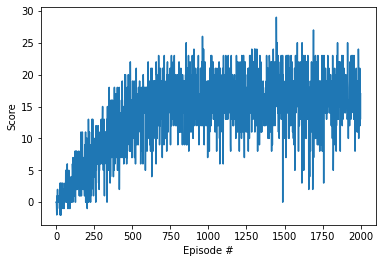

In [7]:
# Launching the training process
scores = dqn_training()

# Plotting the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Checking agent performance

In [8]:
# Load the weights from file (if needed)
agent.qnetwork_local.load_state_dict(torch.load('banana_collector_DQN_agent.pth'))

In [9]:
# Checking the performance the trained agent in the Environment
env_info = env.reset(train_mode=False)[brain_names[0]] # reset the environment
state = env_info.vector_observations[0]                # get the current state
score = 0                                              # initialize the score

while True:
    action = agent.act(state, eps=0.0)                 # select an action
    env_info = env.step(action)[brain_names[0]]        # send the action to the environment
    next_state = env_info.vector_observations[0]       # get the next state
    reward = env_info.rewards[0]                       # get the reward
    done = env_info.local_done[0]                      # see if episode has finished
    score += reward                                    # update the score
    state = next_state                                 # roll over the state to next time step
    if done:                                          # exit loop if episode finished
        break
    
print("Smart Agent Score: {}".format(score))

Smart Agent Score: 16.0


In [10]:
# Taking random actions in the Environment
env_info = env.reset(train_mode=False)[brain_names[0]] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_names[0]]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Random Agent Score: {}".format(score))

Random Agent Score: 1.0


### Closing the environment

In [11]:
# Closing the environment
env.close()